# 01_Data_Preprocessing_&_Cleaning

In this step, we prepare the Heart Disease dataset for analysis and modeling. 

The main objectives are to:
- Import the required Python libraries.  
- Load the dataset into a Pandas DataFrame.
- Explore the dataset structure (dimensions, data types, missing values).  
- Clean the data by handling missing values and converting data types.  


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

### Understanding the Dataset

The Heart Disease dataset is sourced from the UCI Machine Learning Repository.  
Although it originally contains 76 attributes, only 14 are commonly used for research and modeling.  

**Important:** In particular, the **Cleveland database** is the only one that has been used by ML researchers to date.  
Therefore, most studies and experiments (including this project) focus on the `processed.cleveland.data` file.  


#### Features Used (14 Attributes)
1. **age** — Age in years  
2. **sex** — Sex (1 = male, 0 = female)  
3. **cp** — Chest pain type (0–3)  
4. **trestbps** — Resting blood pressure (mm Hg)  
5. **chol** — Serum cholesterol (mg/dl)  
6. **fbs** — Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)  
7. **restecg** — Resting electrocardiographic results (0–2)  
8. **thalach** — Maximum heart rate achieved  
9. **exang** — Exercise-induced angina (1 = yes, 0 = no)  
10. **oldpeak** — ST depression induced by exercise relative to rest  
11. **slope** — Slope of the peak exercise ST segment  
12. **ca** — Number of major vessels (0–3) colored by fluoroscopy  
13. **thal** — Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)  
14. **num (target)** — Diagnosis of heart disease  
   - 0 = no heart disease  
   - 1, 2, 3, 4 = presence of heart disease  

### Notes
- The dataset contains missing values in some columns.  
- The target variable `num` is often binarized into:  
  - 0 = No disease  
  - 1 = Presence of disease (values 1–4 grouped together)  

This dataset provides the foundation for building classification models to predict the presence of heart disease.


In [2]:
# Load the Heart Disease UCI dataset
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv("../Data/processed.cleveland.data", header=None, names=columns,  sep=",")

print("Shape:", df.shape)
print("Information:", df.info())
df.head()

Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
Information: None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Handling Missing Values

According to the UCI documentation, the dataset contains missing values which are 
commonly represented as `"?"`. However, to be safe, we will scan the dataset for all 
possible forms of missing data.

#### Actions:
1. Check for standard `NaN` values.
2. Search for non-standard placeholders (e.g., `"?"`, `"NA"`, `"N/A"`, `"--"`, `"999"`).
3. Replace any detected placeholders with proper `NaN` so they can be handled by pandas.

Missing values per column before imputation:-


In [3]:
# Check normal missing values
print("Missing values (NaN) in each column:")
print(df.isnull().sum())

# Check for common placeholders
placeholders = ["?", "NA", "N/A", "--", "999"]

print("\nChecking for placeholder values:")
for val in placeholders:
    count = (df == val).sum().sum()
    print(f"'{val}': {count}")

# Replace any found placeholders with NaN
df.replace(placeholders, np.nan, inplace=True)

# Double-check after replacement
print("\nMissing values after replacement:")
print(df.isnull().sum())


Missing values (NaN) in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Checking for placeholder values:
'?': 6
'NA': 0
'N/A': 0
'--': 0
'999': 0

Missing values after replacement:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


Missing values after imputation:-

In [4]:
# Convert these categorical columns to numeric , forcing errors "?" to NaN
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [5]:
# Check dtypes 
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [6]:
# Handle missing values
df.fillna(df.median(), inplace=True)

In [7]:
# Check missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


#### Binary Classification
Binary classification simplifies model training and evaluation, especially for Logistic Regression and SVM, which are naturally suited for binary tasks.
It also makes clustering comparisons easier.

In [8]:
# Check the class distribution 
print(df["num"].value_counts())

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


Class 0 (no disease) has 164 instances, while classes 1–4 (disease) are fewer, with class 4 having only 13 instances. 
This imbalance makes multiclass classification challenging, as models may struggle with underrepresented classes.


In [9]:
# Convert the target variable to binary
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

In [10]:
df["num"].value_counts()

num
0    164
1    139
Name: count, dtype: int64

In [11]:
# Ensure sex is integer
df["sex"] = df["sex"].astype(int)

### One-Hot Encoding
One-Hot Encoding converts categorical features into binary vectors, allowing ML models to handle non-numeric data effectively.
It ensures categories are represented without implying any ordinal relationship.  

In [12]:
# Define categorical columns
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the DataFrame
print("Shape after encoding:", df.shape)
df.head()

Shape after encoding: (303, 21)


,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


### Standardize Numerical Features
Standardization rescales features to have zero mean and unit variance, improving the performance of algorithms sensitive to feature scale, such as Logistic Regression, and SVM.

In [13]:
# Define numerical columns
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


### Exploratory Data Analysis (EDA)
EDA helps us understand the structure and relationships within the dataset before model training.  

Visualize the distribution of all features using **Histograms** to understand their spread.

Plot **a Correlation Heatmap** to observe relationships between different features, which helps identify strong positive or negative correlations.

Generate **Boxplots** for each numeric feature to detect outliers and visualize the data distribution in more detail.

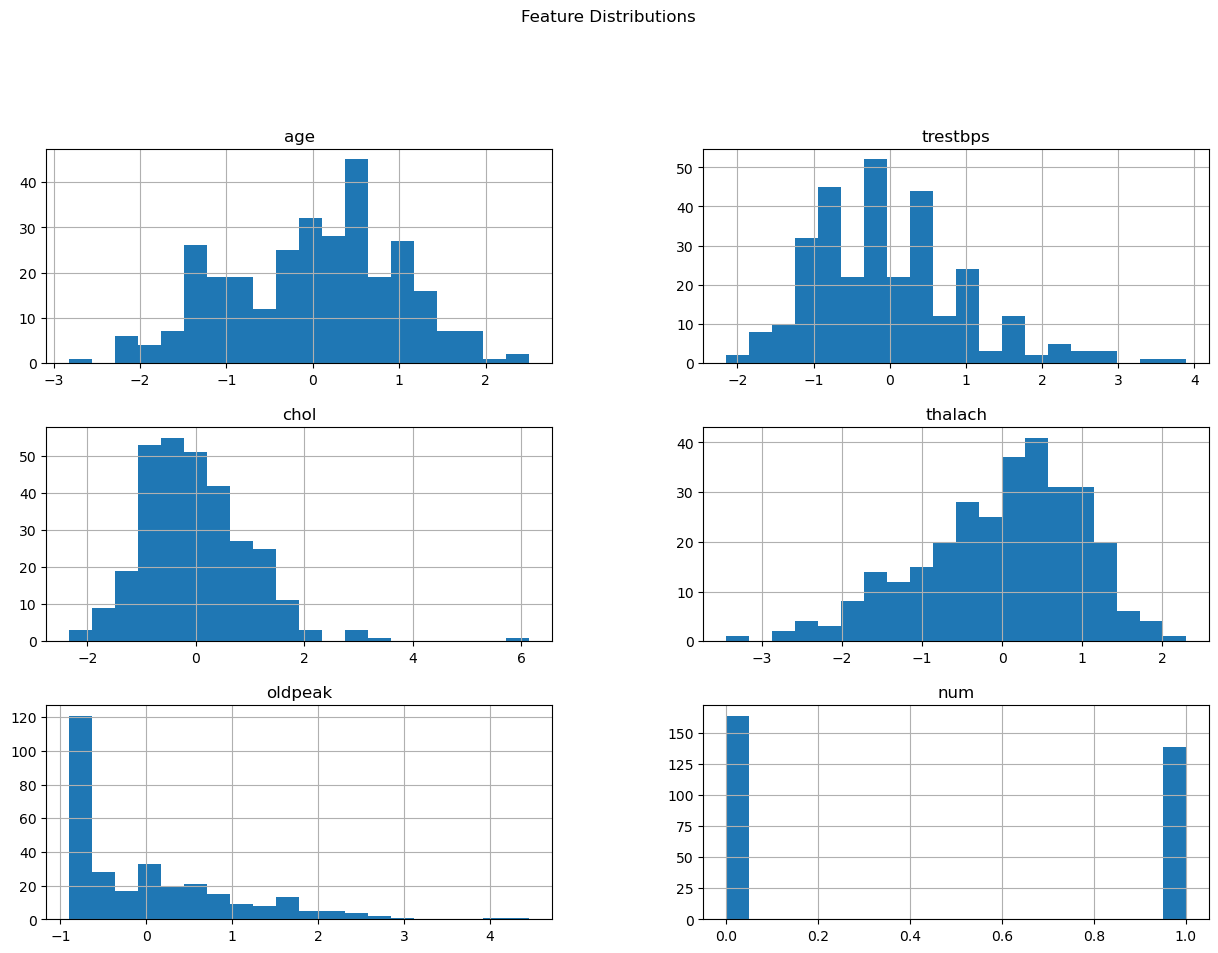

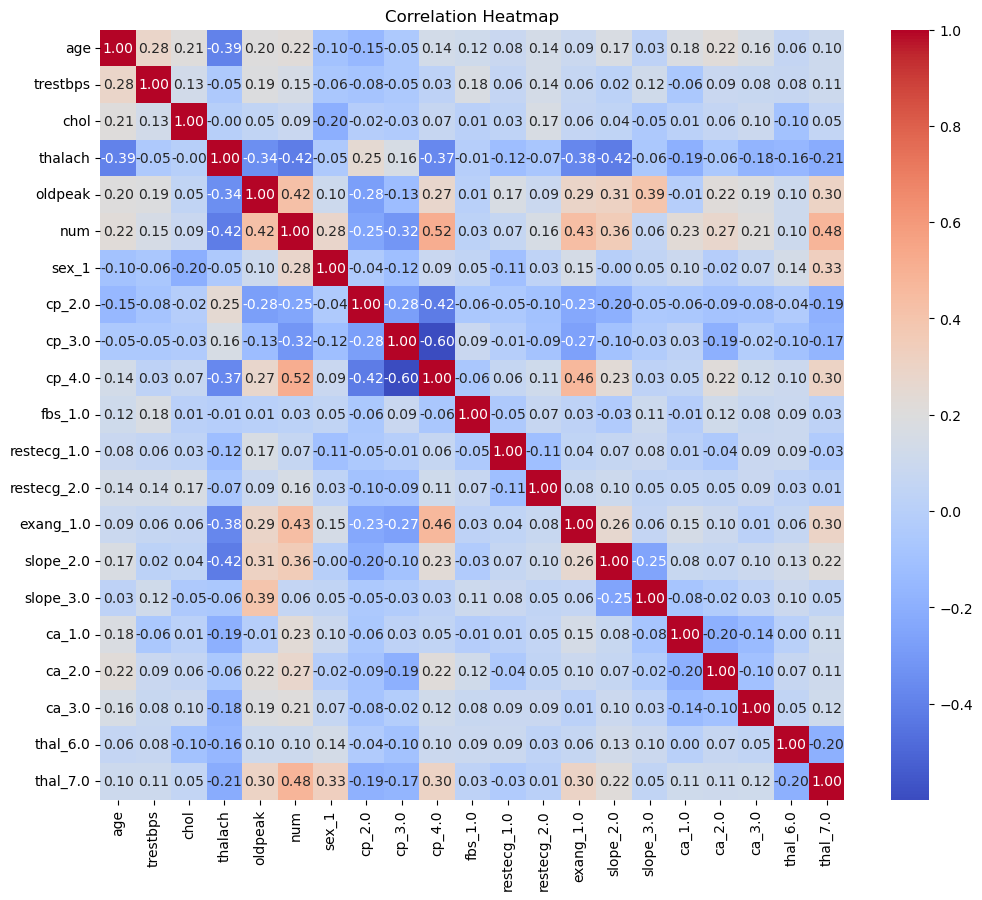

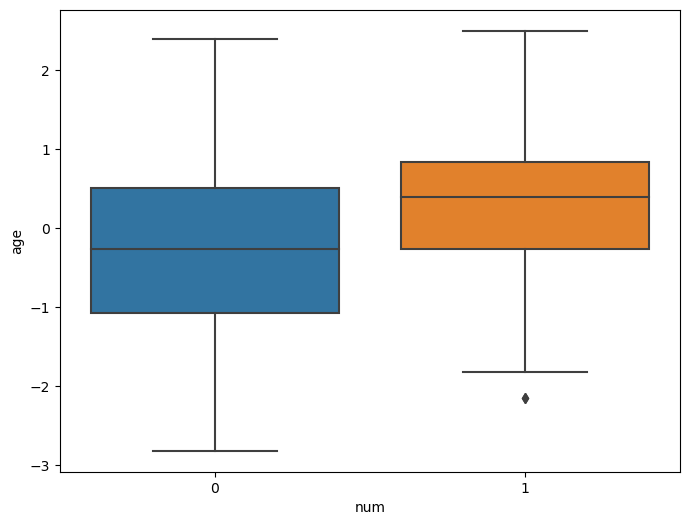

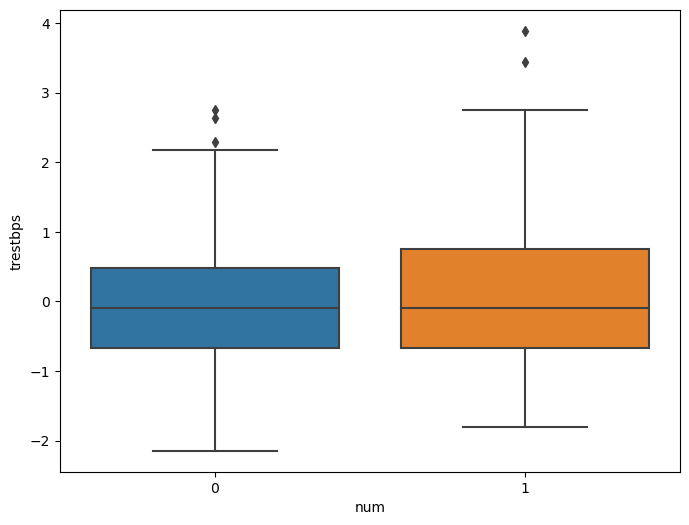

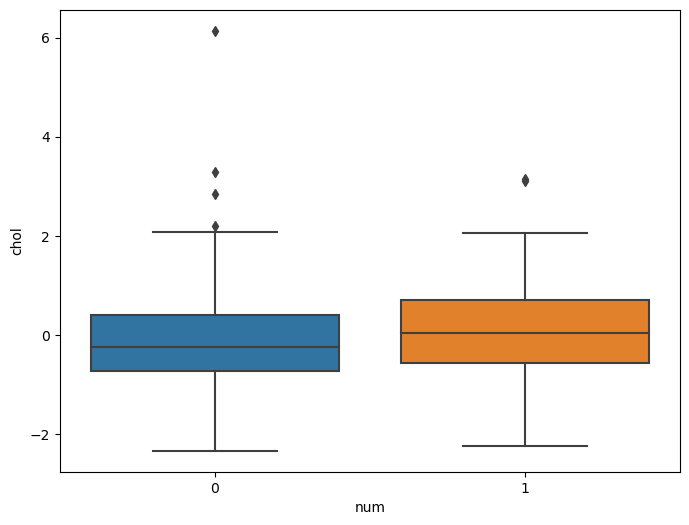

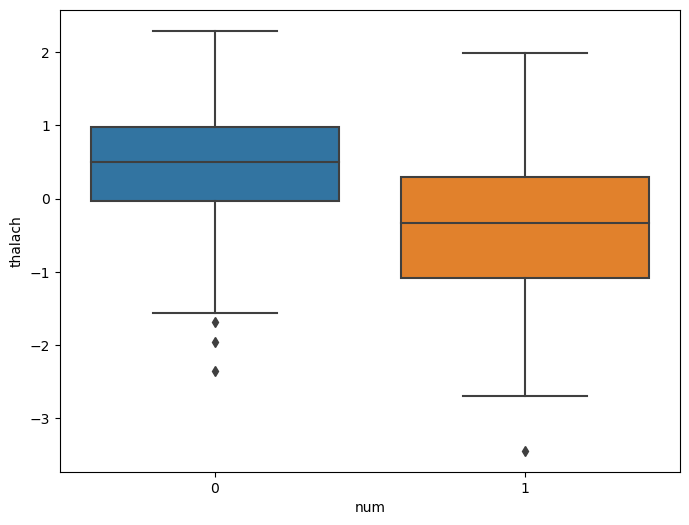

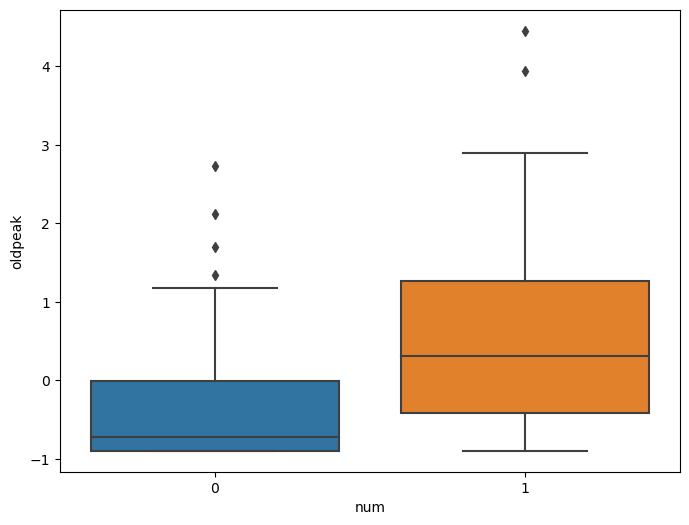

In [14]:
# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Correlation Heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for numerical features by target
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="num", y=col, data=df)
    plt.show()

In [15]:
df.to_csv('../Data/cleaned_heart_disease.csv', index=False)
print("\n Cleaned dataset saved as 'cleaned_heart_disease.csv' and ready for modeling.")
df


 Cleaned dataset saved as 'cleaned_heart_disease.csv' and ready for modeling.


,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,1,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,1,True,False,False,True,...,False,False,False,True,False,False,True,False,False,True
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,1,True,False,False,True,...,False,False,True,True,False,True,False,False,False,True
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,1,False,True,False,False,...,False,True,False,True,False,True,False,False,False,False


By completing preprocessing, we ensure the dataset is consistent, clean, and well-structured, making it ready for further exploration and model development.


---------------------